<ipython-input-60-7a6bb57d8714>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Arsenal['Year'] = df_Arsenal['Year'].str.replace("\–.*","")
<ipython-input-60-7a6bb57d8714>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Liverpool['Year'] = df_Liverpool['Year'].str.replace("\–.*","")
<ipython-input-60-7a6bb57d8714>:32: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Man_United['Year'] = df_Man_United['Year'].str.replace("\–.*","")
<ipython-input-60-7a6bb57d8714>:44: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Chelsea['Year'] = df_Chelsea['Year'].str.replace("\–.*","")


<IPython.core.display.Javascript object>


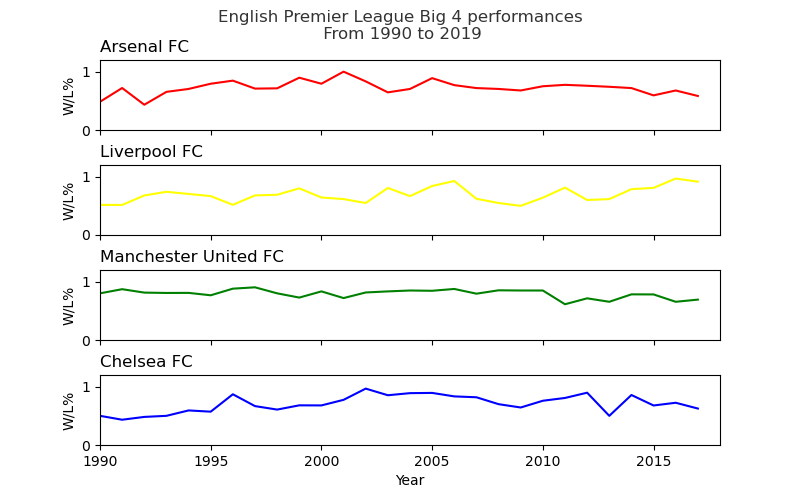

In [60]:
!pip install lxml
import pandas as pd
import numpy as np

#Arsenal FC
df_Arsenal = pd.read_html('https://en.wikipedia.org/wiki/List_of_Arsenal_F.C._seasons')[3]
df_Arsenal = pd.DataFrame(df_Arsenal)
df_Arsenal = df_Arsenal.iloc[0:,[0,3,5,8]]
df_Arsenal.columns = ['Year','W','L','Pts']
df_Arsenal['Year'] = df_Arsenal['Year'].str.replace("\–.*","")
df_Arsenal['Year'] = df_Arsenal['Year'].replace("",np.nan).replace("",np.nan)
df_Arsenal = df_Arsenal.dropna()
df_Arsenal = df_Arsenal[df_Arsenal['Year'] >= "1992"]

#Liverpool FC
df_Liverpool = pd.read_html('https://en.wikipedia.org/wiki/List_of_Liverpool_F.C._seasons')[2]
df_Liverpool = pd.DataFrame(df_Liverpool)
df_Liverpool = df_Liverpool.iloc[0:-1,[0,3,5,8]]
df_Liverpool.columns = ['Year','W','L','Pts']
df_Liverpool = df_Liverpool.drop(13)
df_Liverpool = df_Liverpool.drop(34)
df_Liverpool['Year'] = df_Liverpool['Year'].str.replace("\–.*","")
df_Liverpool['Year'] = df_Liverpool['Year'].replace("",np.nan).replace("",np.nan)
df_Liverpool = df_Liverpool.dropna()
df_Liverpool = df_Liverpool[df_Liverpool['Year'] >= "1992"]

#Manchester United
df_Man_United = pd.read_html('https://en.wikipedia.org/wiki/List_of_Manchester_United_F.C._seasons')[2]
df_Man_United = pd.DataFrame(df_Man_United)
df_Man_United = df_Man_United.iloc[0:,[0,3,5,8]]
df_Man_United.columns = ['Year','W','L','Pts']
df_Man_United['Year'] = df_Man_United['Year'].str.replace("\–.*","")
df_Man_United['Year'] = df_Man_United['Year'].replace("",np.nan).replace("",np.nan)
df_Man_United = df_Man_United.dropna()
df_Man_United = df_Man_United[df_Man_United['Year'] >= "1992"]

#Chelsea FC
df_Chelsea = pd.read_html('https://en.wikipedia.org/wiki/List_of_Chelsea_F.C._seasons')[2]
df_Chelsea = pd.DataFrame(df_Chelsea)
df_Chelsea = df_Chelsea.iloc[0:-2,[0,3,5,8]]
df_Chelsea.columns = ['Year','W','L','Pts']
df_Chelsea = df_Chelsea.drop(10)
df_Chelsea = df_Chelsea.drop(31)
df_Chelsea['Year'] = df_Chelsea['Year'].str.replace("\–.*","")
df_Chelsea['Year'] = df_Chelsea['Year'].replace("",np.nan).replace("",np.nan)#df_Chelsea = df_Chelsea.dropna()
df_Chelsea = df_Chelsea[df_Chelsea['Year'] >= "1992"]



df_Arsenal['W']=df_Arsenal['W'].astype(int)
df_Arsenal['L']=df_Arsenal['L'].astype(int)
df_Arsenal['Arsenal_W/L%'] = df_Arsenal['W']/(df_Arsenal['W']+df_Arsenal['L'])
df_Arsenal = df_Arsenal[['Year','Arsenal_W/L%']]


df_Liverpool['W']=df_Liverpool['W'].astype(int)
df_Liverpool['L']=df_Liverpool['L'].astype(int)
df_Liverpool['Liverpool_W/L%'] = df_Liverpool['W']/(df_Liverpool['W']+df_Liverpool['L'])
df_Liverpool = df_Liverpool[['Year','Liverpool_W/L%']]


df_Man_United['W']=df_Man_United['W'].astype(int)
df_Man_United['L']=df_Man_United['L'].astype(int)
df_Man_United['Man_United_W/L%'] = df_Man_United['W']/(df_Man_United['W']+df_Man_United['L'])
df_Man_United = df_Man_United[['Year','Man_United_W/L%']]


df_Chelsea['W']=df_Chelsea['W'].astype(int)
df_Chelsea['L']=df_Chelsea['L'].astype(int)
df_Chelsea['Chelsea_W/L%'] = df_Chelsea['W']/(df_Chelsea['W']+df_Chelsea['L'])
df_Chelsea = df_Chelsea[['Year','Chelsea_W/L%']]




#print(df_Chelsea)
#print(df_Man_United)
#print(df_Arsenal)
#print(df_Liverpool)
#print(df_Man_United)

Big4_df = pd.merge(df_Arsenal, df_Liverpool, on='Year')
Big4_df = pd.merge(Big4_df, df_Man_United, on='Year')
Big4_df = pd.merge(Big4_df, df_Chelsea, on='Year')


import matplotlib.pyplot as plt
%matplotlib notebook

#Big4_df.plot(kind = 'bar')

#Big4_df.plot.hist(alpha=0.7)

#subplots = Big4_df.plot(subplots=True)
#Big4_df.plot(subplots=True, layout=(4, 1), figsize=(6, 6));    


fig, axes = plt.subplots(4, figsize=(8, 5), sharex=True)
fig.suptitle('English Premier League Big 4 performances\n From 1990 to 2019',alpha=0.8)
plt.setp(axes, xticks=np.arange(0,31,step=5), xticklabels=['1990', '1995', '2000', '2005', '2010', '2015', '2020'],
         xlim=[0,28], ylim=[0,1.2], xlabel='Year')
columns = ['Arsenal_W/L%','Liverpool_W/L%', 'Man_United_W/L%', 'Chelsea_W/L%']
titles = ['Arsenal FC','Liverpool FC', 'Manchester United FC', 'Chelsea FC']
colors = ['red', 'Yellow', 'Green', 'Blue']
axes1 = axes[0]
axes2 = axes[1]
axes3 = axes[2]
axes4 = axes[3]
axes = [axes1,axes2,axes3,axes4]

#plt.title("EPL")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
for i in range(len(axes)):
    Big4_df[columns[i]].plot(ax=axes[i], color=colors[i]);
    axes[i].set_title(titles[i],loc='left');
    axes[i].set_ylabel('W/L%');
